# Hierarchical Clustering
Hierarchical clustering is a clustering technique that builds a hierarchy of clusters. It is also known as hierarchical cluster analysis or HCA. Hierarchical clustering algorithms can be classified into two types: **agglomerative** and **divisive**.

1. **Agglomerative (bottom-up)**: Each data point starts in its own cluster, and pairs of clusters are merged together until all clusters have been merged into one big cluster.
2. **Divisive (top-down)**: All data points start in one cluster, and splits are performed recursively until each data point is in its own cluster.

The results of hierarchical clustering are usually presented in a dendrogram. A dendrogram is a tree-like structure that shows the sequence in which clusters were merged (or split) and the distance at which each merge (or split) took place.

<img src="media/dendrogram.png" alt="Dendrogram" width="500">

## Distance Matrix
The main data structure used by hierarchical clustering algorithms, which allows them to keep track of distances between clusters, is the distance matrix.

If the dataset has n data points $x_1, x_2, ..., x_n$, then the distance matrix is an $n \times n$ matrix $D$ such that $D_{ij}$ is the distance between data points $x_i$ and $x_j$. The distance matrix is symmetric, i.e. $D_{ij} = D_{ji}$ and its diagonal entries are zero, i.e. $D_{ii} = 0$.

## Linkage Methods
In order to decide which clusters to combine (or split), we need a measure of distance between two sets of points (clusters). A linkage method (or criterion) specifies how distances between clusters are calculated.

### Single Linkage ($\min$)
The distance between two clusters is the minimum distance between any two points in the clusters.

$$d(C_i, C_j) = \min_{x \in C_i, y \in C_j} \left\| x - y \right\|$$

<img src="media/single-linkage.png" alt="Single Linkage" width="500">

- Single linkage is sensitive to noise and outliers.
- Single linkage tends to produce long, "loose" clusters.
- It can capture non-convex clusters.
- It is prone to "chaining" effect where clusters are connected by a thin line of points.

### Complete Linkage ($\max$)
The distance between two clusters is the maximum distance between any two points in the clusters.

$$d(C_i, C_j) = \max_{x \in C_i, y \in C_j} \left\| x - y \right\|$$

<img src="media/complete-linkage.png" alt="Complete Linkage" width="500">

- Complete linkage is less sensitive to noise and outliers than single linkage.
- It tends to produce compact clusters.
- Struggles to capture non-convex clusters.

### Average Linkage ($\text{avg}$)
The distance between two clusters is the average distance between any two points in the clusters.

$$d(C_i, C_j) = \frac{1}{|C_i| |C_j|} \sum_{x \in C_i} \sum_{y \in C_j} \left\| x - y \right\|$$

<img src="media/average-linkage.png" alt="Average Linkage" width="500">

- Average linkage is less sensitive to noise and outliers than single linkage.
- It tends to produce compact clusters.
- Biased towards globular clusters.

### Centroid Linkage ($\text{centroid}$)
The distance between two clusters is the distance between their centroids.

$$d(C_i, C_j) = \left\| \frac{1}{|C_i|} \sum_{x \in C_i} x - \frac{1}{|C_j|} \sum_{y \in C_j} y \right\|$$

<img src="media/centroid-linkage.png" alt="Centroid Linkage" width="500">

- Centroid linkage is less sensitive to noise and outliers than single linkage.
- Less suitable for non-globular clusters.
- Can suffer from "inversion phenomenon" where merging two clusters increases the overall distortion.
- Supports only Euclidean distance.

### Ward's Method
Ward's method is a hierarchical clustering algorithm that minimizes the total within-cluster variance. The within-cluster variance is defined as the sum of the squared distances between each point and the cluster centroid.

$$d(C_i, C_j) = \frac{|C_i| |C_j|}{|C_i| + |C_j|} \left\| c_i - c_j \right\|^2$$

where $c_i$ and $c_j$ are the centroids of clusters $C_i$ and $C_j$ respectively.

<img src="media/wards-method.png" alt="Ward's Method" width="500">

- Ward's method is less sensitive to noise and outliers than single linkage.
- Assumes that the clusters have approximately the same size.
- Less suitable for non-globular clusters.
- Supports only Euclidean distance.

## Agglomerative Clustering Algorithm
The algorithm gets a distance matrix D and a linkage criterion, and performs the following steps:

1. Initialize each data point as a cluster.
2. Repeat until there is only one cluster:
    1. Find the closest pair of clusters according to the linkage criterion.
    2. Merge the two clusters into a single cluster.
    3. Update the distance matrix.

The time complexity of the algorithm is $O(n^3)$, where $n$ is the number of data points. However, the time complexity can be reduced to $O(n^2 \log n)$ by using a priority queue to store the distances between clusters.

## Agglomerative Clustering in Scikit-Learn
Scikit-Learn also provides an implementation of agglomerative clustering in the class `sklearn.cluster.AgglomerativeClustering.`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [2]:
X, y = make_blobs(n_samples=500, centers=3, cluster_std=0.6, random_state=0)
X = StandardScaler().fit_transform(X)

In [3]:
def plot_data(X):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], edgecolor='k', legend=False)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
def plot_clusters(X, labels):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='tab10', edgecolor='k', legend=False)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

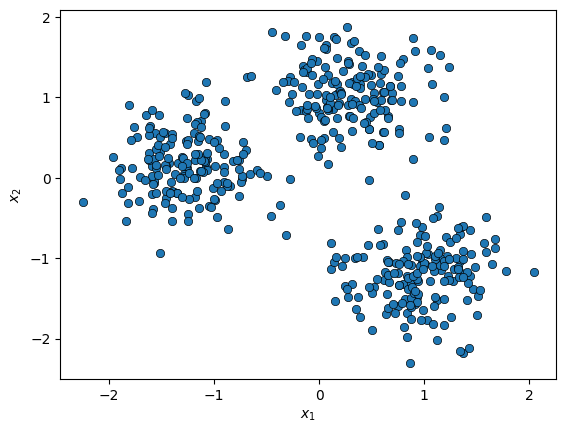

In [4]:
plot_data(X)

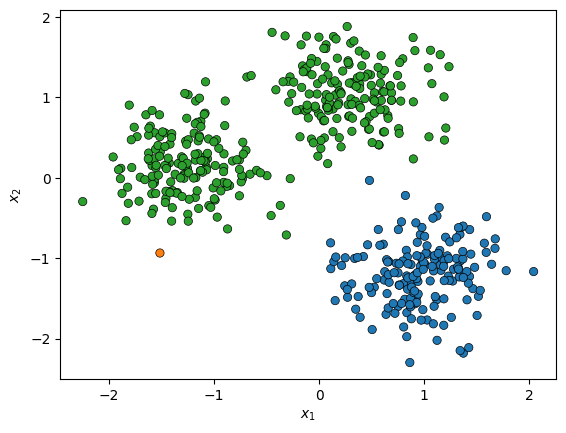

In [5]:
agg = AgglomerativeClustering(n_clusters=3, linkage='single')
agg.fit(X)

plot_clusters(X, agg.labels_)

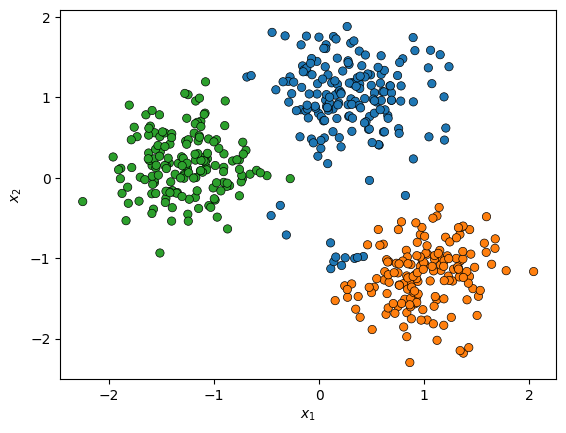

In [6]:
agg = AgglomerativeClustering(n_clusters=3, linkage='complete')
agg.fit(X)

plot_clusters(X, agg.labels_)

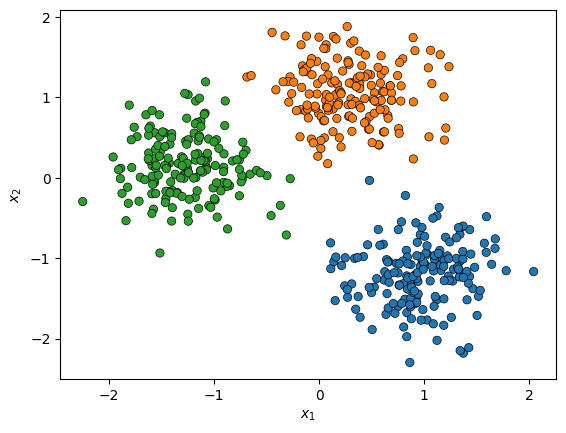

In [7]:
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg.fit(X)

plot_clusters(X, agg.labels_)

Ward’s method gave the best results on this dataset, since the clusters have spherical shapes and are roughly of equal size. Ward’s method aims to minimize the variance within each cluster, making it particularly suited for datasets with compact and well-defined clusters, as is the case here.

## Summary
Let’s summarize the pros and cons of hierarchical clustering as compared to other clustering methods.

**Pros:**
- Outputs a hierarchy of clusters, which provides a more detailed view of the data’s structure compared to partitioning methods such as k-means.
- Can detect non-spherical cluster structures unlike other algorithms such as k-means.
- Supports various linkage methods (e.g., single, complete, average), which can capture various cluster shapes.
- No need to specify the number of clusters in advance. The resultant dendrogram can be cut at various levels to produce different number of clusters.
- Provides a visual representation (dendrogram) that is useful for understanding the data structure and the relationships between clusters.
- The method is deterministic, i.e., it will produce the same clusters in every run.
- Supports various distance metrics.

**Cons:**
- Computationally intensive, making it less suitable for large datasets.
- Some linkage methods (especially single linkage) are sensitive to outliers, which can cause two significantly separate clusters to merge.
- The choice of linkage method can significantly impact the clustering results.
- Can struggle with detecting clusters with complex geometries (such as clusters located inside each other).
- Deciding where to cut the dendrogram to get a desired number of clusters can be ambiguous and might require domain knowledge.
- The dendrograms are hard to understand and analyze for large datasets.
- There is no clear objective function that the algorithm tries to optimize.